**Rozdział 13. Wczytywanie i przetwarzanie wstępne danych za pomocą modułu TensorFlow**

_Notatnik ten zawiera przykładowy kod i rozwiązania ćwiczeń opisane w rozdziale 13._

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/13_loading_and_preprocessing_data.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Uruchom w Google Colab (wersja angielska)</a>
  </td>
</table>

# Konfiguracja

Importujmy najpierw kilka popularnych modułów, upewnijmy się, że będą wstawiane wykresy MatplotLib, a także przygotujmy funkcję zapisującą rysunki. Sprawdzimy także, czy jest zainstalowane środowisko Python 3.5 lub nowsze (możliwe, że kod będzie działał w środowisku Python 2.x, zostało ono jednak porzucone, dlatego zalecamy korzystanie ze środowiska Python 3), a także biblioteka Scikit-Learn 0.20 lub nowsza i TensorFlow 2.0 lub nowszy.

In [1]:
# Wymagane środowisko Python ≥3.5
import sys
assert sys.version_info >= (3, 5)

# Wymagana biblioteka Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version istnieje jedynie w środowisku Colab.
    %tensorflow_version 2.x
    !pip install -q -U tfx==0.15.0rc0
    print("Możesz spokojnie zignorować błędy dotyczące niekompatybilności pakietu.")
except Exception:
    pass

# Wymagany moduł TensorFlow ≥2.0
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Importuje standardowe biblioteki
import numpy as np
import os

# Aby wyniki uzyskiwane w tym notatniku były odtwarzalne
np.random.seed(42)

# Do rysowania ładnych wykresów
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ścieżka zapisywania rysunków
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "R13"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "rysunki", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Zapisywanie rysunku", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

TensorFlow 2.x selected.
     |████████████████████████████████| 481kB 4.6MB/s 
     |████████████████████████████████| 1.4MB 11.4MB/s 
     |████████████████████████████████| 3.4MB 27.0MB/s 
     |████████████████████████████████| 112kB 52.7MB/s 
     |████████████████████████████████| 1.9MB 53.0MB/s 
     |████████████████████████████████| 4.9MB 58.4MB/s 
     |████████████████████████████████| 2.3MB 75.1MB/s 
     |████████████████████████████████| 225kB 61.5MB/s 
     |████████████████████████████████| 31.2MB 101kB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
     |████████████████████████████████| 1.2MB 58.6MB/s 
     |████████████████████████████████| 235kB 62.6MB/s 
     |████████████████████████████████| 59.2MB 57kB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
     |████████████████████████████████| 81kB 14.5MB/s 
     |████████████████████████████████| 235kB 52.5MB/s 
     |████████████████████████████████| 92kB 15.9MB/s 
     |████████████████████████

## Zestawy danych

In [2]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

Jest to równoważne:

In [0]:
dataset = tf.data.Dataset.range(10)

In [4]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [5]:
dataset = dataset.repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([8 9], shape=(2,), dtype=int64)


In [0]:
dataset = dataset.map(lambda x: x * 2)

In [7]:
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int64)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int64)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int64)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int64)
tf.Tensor([16 18], shape=(2,), dtype=int64)


In [8]:
dataset = dataset.apply(tf.data.experimental.unbatch())

Instructions for updating:
Use `tf.data.Dataset.unbatch()`.


In [0]:
dataset = dataset.filter(lambda x: x < 10)  # zachowuje jedynie elementy < 10

In [10]:
for item in dataset.take(3):
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)


In [11]:
dataset = tf.data.Dataset.range(10).repeat(3)
dataset = dataset.shuffle(buffer_size=3, seed=42).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 3 4 2 1 5 8], shape=(7,), dtype=int64)
tf.Tensor([6 9 7 2 3 1 4], shape=(7,), dtype=int64)
tf.Tensor([6 0 7 9 0 1 2], shape=(7,), dtype=int64)
tf.Tensor([8 4 5 5 3 8 9], shape=(7,), dtype=int64)
tf.Tensor([7 6], shape=(2,), dtype=int64)


## Dzielenie zestawu danych California na wiele plików CSV

Zacznijmy od wczytania i przygotowania zestawu danych California housing. Najpierw go wczytamy, następnie podzielimy na zbiory uczący, walidacyjny i testowy, po czym przeskalujemy:

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  


W przypadku bardzo dużych zestawów danych, które nie mieszczą się w pamięci, zazwyczaj chcemy podzielić je najpierw na wiele mniejszych plików, które moduł TensorFlow będzie odczytywał równolegle. W ramach demonstracji podzielimy nasz zestaw danych i zapiszemy go w 20 plikach CSV:

In [0]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = os.path.join("zestawy danych", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, "moj_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [0]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_multiple_csv_files(train_data, "uczacy", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "walidacyjny", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "testowy", header, n_parts=10)

No dobrze, spójrzmy na kilka pierwszych wierszy w każdym z tych plików CSV:

In [19]:
import pandas as pd

pd.read_csv(train_filepaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


Albo w trybie tekstowym:

In [20]:
with open(train_filepaths[0]) as f:
    for i in range(5):
        print(f.readline(), end="")

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621
7.1736,12.0,6.289002557544757,0.9974424552429667,1054.0,2.6956521739130435,33.55,-117.7,2.621


In [21]:
train_filepaths

['zestawy danych/housing/moj_uczacy_00.csv',
 'zestawy danych/housing/moj_uczacy_01.csv',
 'zestawy danych/housing/moj_uczacy_02.csv',
 'zestawy danych/housing/moj_uczacy_03.csv',
 'zestawy danych/housing/moj_uczacy_04.csv',
 'zestawy danych/housing/moj_uczacy_05.csv',
 'zestawy danych/housing/moj_uczacy_06.csv',
 'zestawy danych/housing/moj_uczacy_07.csv',
 'zestawy danych/housing/moj_uczacy_08.csv',
 'zestawy danych/housing/moj_uczacy_09.csv',
 'zestawy danych/housing/moj_uczacy_10.csv',
 'zestawy danych/housing/moj_uczacy_11.csv',
 'zestawy danych/housing/moj_uczacy_12.csv',
 'zestawy danych/housing/moj_uczacy_13.csv',
 'zestawy danych/housing/moj_uczacy_14.csv',
 'zestawy danych/housing/moj_uczacy_15.csv',
 'zestawy danych/housing/moj_uczacy_16.csv',
 'zestawy danych/housing/moj_uczacy_17.csv',
 'zestawy danych/housing/moj_uczacy_18.csv',
 'zestawy danych/housing/moj_uczacy_19.csv']

## Tworzenie potoku danych wejściowych

In [0]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

In [23]:
for filepath in filepath_dataset:
    print(filepath)

tf.Tensor(b'zestawy danych/housing/moj_uczacy_05.csv', shape=(), dtype=string)
tf.Tensor(b'zestawy danych/housing/moj_uczacy_16.csv', shape=(), dtype=string)
tf.Tensor(b'zestawy danych/housing/moj_uczacy_01.csv', shape=(), dtype=string)
tf.Tensor(b'zestawy danych/housing/moj_uczacy_17.csv', shape=(), dtype=string)
tf.Tensor(b'zestawy danych/housing/moj_uczacy_00.csv', shape=(), dtype=string)
tf.Tensor(b'zestawy danych/housing/moj_uczacy_14.csv', shape=(), dtype=string)
tf.Tensor(b'zestawy danych/housing/moj_uczacy_10.csv', shape=(), dtype=string)
tf.Tensor(b'zestawy danych/housing/moj_uczacy_02.csv', shape=(), dtype=string)
tf.Tensor(b'zestawy danych/housing/moj_uczacy_12.csv', shape=(), dtype=string)
tf.Tensor(b'zestawy danych/housing/moj_uczacy_19.csv', shape=(), dtype=string)
tf.Tensor(b'zestawy danych/housing/moj_uczacy_07.csv', shape=(), dtype=string)
tf.Tensor(b'zestawy danych/housing/moj_uczacy_09.csv', shape=(), dtype=string)
tf.Tensor(b'zestawy danych/housing/moj_uczacy_13.csv

In [0]:
n_readers = 5
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers)

In [25]:
for line in dataset.take(5):
    print(line.numpy())

b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418'
b'2.4792,24.0,3.4547038327526134,1.1341463414634145,2251.0,3.921602787456446,34.18,-118.38,2.0'
b'4.2708,45.0,5.121387283236994,0.953757225433526,492.0,2.8439306358381504,37.48,-122.19,2.67'
b'2.1856,41.0,3.7189873417721517,1.0658227848101265,803.0,2.0329113924050635,32.76,-117.12,1.205'
b'4.1812,52.0,5.701388888888889,0.9965277777777778,692.0,2.4027777777777777,33.73,-118.31,3.215'


Zwróć uwagę, że pole 4. jest traktowane jako łańcuch znaków.

In [26]:
record_defaults=[0, np.nan, tf.constant(np.nan, dtype=tf.float64), "Witaj", tf.constant([])]
parsed_fields = tf.io.decode_csv('1,2,3,4,5', record_defaults)
parsed_fields

[<tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.0>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'4'>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

Zauważ, że wszystkie brakujące pole są zastępowane ich domyślną wartością, jeżeli jest dostępna:

In [27]:
parsed_fields = tf.io.decode_csv(',,,,5', record_defaults)
parsed_fields

[<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=nan>,
 <tf.Tensor: shape=(), dtype=float64, numpy=nan>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'Witaj'>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

Zatem pole 5. jest obowiązkowe (ponieważ wprowadziliśmy `tf.constant([])` jako "wartość domyślną"), dlatego zostanie wyświetlony komunikat o wyjątku, jeżeli go nie dostarczymy:

In [28]:
try:
    parsed_fields = tf.io.decode_csv(',,,,', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

Field 4 is required but missing in record 0! [Op:DecodeCSV]


Liczba pól powinna odpowiadać dokładnie wartości podanej w `record_defaults`:

In [29]:
try:
    parsed_fields = tf.io.decode_csv('1,2,3,4,5,6,7', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

Expect 5 fields but have 7 in record 0 [Op:DecodeCSV]


In [0]:
n_inputs = 8 # X_train.shape[-1]

@tf.function
def preprocess(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    y = tf.stack(fields[-1:])
    return (x - X_mean) / X_std, y

In [31]:
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579157,  1.216324  , -0.05204565, -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

In [0]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(1)

In [33]:
train_set = csv_reader_dataset(train_filepaths, batch_size=3)
for X_batch, y_batch in train_set.take(2):
    print("X =", X_batch)
    print("y =", y_batch)
    print()

X = tf.Tensor(
[[ 0.3840421   1.6118649   0.00901462 -0.09058454 -0.22475839 -0.29735214
   1.0932282  -1.4921209 ]
 [-1.3427405   0.8998913  -0.15746215 -0.03891422 -0.78510004  0.04503759
   1.0042177  -1.322202  ]
 [-1.1389982  -0.91959685 -0.11798144 -0.10580315 -0.927467   -0.583333
   0.76060843 -1.1822641 ]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[3.55 ]
 [1.133]
 [1.813]], shape=(3, 1), dtype=float32)

X = tf.Tensor(
[[-1.139522   -1.6315705  -0.6648821  -0.04444493 -0.03676102 -0.39615592
   1.102598   -1.1222944 ]
 [ 0.3894891  -0.998705    0.011425   -0.13389182 -1.0269413  -0.30809236
  -1.3616015   1.1766324 ]
 [ 0.42332396  0.5834586   0.22120783 -0.08990201 -0.32879576 -0.12090377
  -0.67293835  0.5369314 ]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[0.758]
 [1.792]
 [2.236]], shape=(3, 1), dtype=float32)



In [0]:
train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

In [0]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [37]:
batch_size = 32
model.fit(train_set, steps_per_epoch=len(X_train) // batch_size, epochs=10,
          validation_data=valid_set)

Train for 362 steps
Epoch 1/10
362/362 [==============================] - 3s 9ms/step - loss: 2.1972 - val_loss: 5.1667
Epoch 2/10
362/362 [==============================] - 1s 4ms/step - loss: 0.7622 - val_loss: 0.9255
Epoch 3/10
362/362 [==============================] - 1s 4ms/step - loss: 0.6504 - val_loss: 0.6018
Epoch 4/10
362/362 [==============================] - 1s 4ms/step - loss: 0.6078 - val_loss: 0.5717
Epoch 5/10
362/362 [==============================] - 1s 4ms/step - loss: 0.5716 - val_loss: 0.5489
Epoch 6/10
362/362 [==============================] - 1s 4ms/step - loss: 0.5403 - val_loss: 0.5524
Epoch 7/10
362/362 [==============================] - 1s 4ms/step - loss: 0.5506 - val_loss: 0.5041
Epoch 8/10
362/362 [==============================] - 1s 4ms/step - loss: 0.5248 - val_loss: 0.4994
Epoch 9/10
362/362 [==============================] - 2s 4ms/step - loss: 0.5094 - val_loss: 0.4996
Epoch 10/10
362/362 [==============================] - 1s 4ms/step - loss: 0.490

In [38]:
model.evaluate(test_set, steps=len(X_test) // batch_size)

161/161 [==============================] - 0s 2ms/step - loss: 0.4847


0.48466225856949824

In [39]:
new_set = test_set.map(lambda X, y: X) # we could instead just pass test_set, Keras would ignore the labels
X_new = X_test
model.predict(new_set, steps=len(X_new) // batch_size)

array([[2.1798444],
       [2.9415104],
       [2.3061395],
       ...,
       [1.5180323],
       [1.6709092],
       [3.0318274]], dtype=float32)

In [40]:
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error

n_epochs = 5
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
total_steps = n_epochs * n_steps_per_epoch
global_step = 0
for X_batch, y_batch in train_set.take(total_steps):
    global_step += 1
    print("\rKrok globalny {}/{}".format(global_step, total_steps), end="")
    with tf.GradientTape() as tape:
        y_pred = model(X_batch)
        main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
        loss = tf.add_n([main_loss] + model.losses)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Krok globalny 1810/1810

In [0]:
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error

@tf.function
def train(model, n_epochs, batch_size=32,
          n_readers=5, n_read_threads=5, shuffle_buffer_size=10000, n_parse_threads=5):
    train_set = csv_reader_dataset(train_filepaths, repeat=n_epochs, n_readers=n_readers,
                       n_read_threads=n_read_threads, shuffle_buffer_size=shuffle_buffer_size,
                       n_parse_threads=n_parse_threads, batch_size=batch_size)
    for X_batch, y_batch in train_set:
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

train(model, 5)

In [42]:
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error

@tf.function
def train(model, n_epochs, batch_size=32,
          n_readers=5, n_read_threads=5, shuffle_buffer_size=10000, n_parse_threads=5):
    train_set = csv_reader_dataset(train_filepaths, repeat=n_epochs, n_readers=n_readers,
                       n_read_threads=n_read_threads, shuffle_buffer_size=shuffle_buffer_size,
                       n_parse_threads=n_parse_threads, batch_size=batch_size)
    n_steps_per_epoch = len(X_train) // batch_size
    total_steps = n_epochs * n_steps_per_epoch
    global_step = 0
    for X_batch, y_batch in train_set.take(total_steps):
        global_step += 1
        if tf.equal(global_step % 100, 0):
            tf.print("\rKrok globalny", global_step, "/", total_steps)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

train(model, 5)

Krok globalny 100 / 1810
Krok globalny 200 / 1810
Krok globalny 300 / 1810
Krok globalny 400 / 1810
Krok globalny 500 / 1810
Krok globalny 600 / 1810
Krok globalny 700 / 1810
Krok globalny 800 / 1810
Krok globalny 900 / 1810
Krok globalny 1000 / 1810
Krok globalny 1100 / 1810
Krok globalny 1200 / 1810
Krok globalny 1300 / 1810
Krok globalny 1400 / 1810
Krok globalny 1500 / 1810
Krok globalny 1600 / 1810
Krok globalny 1700 / 1810
Krok globalny 1800 / 1810


Here is a short description of each method in the `Dataset` class:

In [43]:
for m in dir(tf.data.Dataset):
    if not (m.startswith("_") or m.endswith("_")):
        func = getattr(tf.data.Dataset, m)
        if hasattr(func, "__doc__"):
            print("● {:21s}{}".format(m + "()", func.__doc__.split("\n")[0]))

● apply()              Applies a transformation function to this dataset.
● as_numpy_iterator()  Returns an iterator which converts all elements of the dataset to numpy.
● batch()              Combines consecutive elements of this dataset into batches.
● cache()              Caches the elements in this dataset.
● concatenate()        Creates a `Dataset` by concatenating the given dataset with this dataset.
● element_spec()       The type specification of an element of this dataset.
● enumerate()          Enumerates the elements of this dataset.
● filter()             Filters this dataset according to `predicate`.
● flat_map()           Maps `map_func` across this dataset and flattens the result.
● from_generator()     Creates a `Dataset` whose elements are generated by `generator`.
● from_tensor_slices() Creates a `Dataset` whose elements are slices of the given tensors.
● from_tensors()       Creates a `Dataset` with a single element, comprising the given tensors.
● interleave()      

## Format binarny `TFRecord`

Plik TFRecord stanowi jedynie listę rekordów binarnych. Możesz stworzyć go za pomocą klasy `tf.io.TFRecordWriter`:

In [0]:
with tf.io.TFRecordWriter("moje_dane.tfrecord") as f:
    f.write(b"Jest to pierwszy rekord")
    f.write(b"A to jest drugi rekord")

Możemy go odczytać za pomocą funkcji `tf.data.TFRecordDataset`:

In [45]:
filepaths = ["moje_dane.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'Jest to pierwszy rekord', shape=(), dtype=string)
tf.Tensor(b'A to jest drugi rekord', shape=(), dtype=string)


Możesz odczytywać wiele plików TFRecord jednocześnie za pomocą jednej funkcji `TFRecordDataset`. Domyślnie będą one odczytywane pojedynczo, ale możemy wyznaczyć `num_parallel_reads=3`, co sprawi, że będą odczytywane trzy pliki jednocześnie, a ich rekordy będą przeplatane:

In [46]:
filepaths = ["moj_test_{}.tfrecord".format(i) for i in range(5)]
for i, filepath in enumerate(filepaths):
    with tf.io.TFRecordWriter(filepath) as f:
        for j in range(3):
            f.write("Plik numer: {}, rekord numer: {}.".format(i, j).encode("utf-8"))

dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=3)
for item in dataset:
    print(item)

tf.Tensor(b'Plik numer: 0, rekord numer: 0.', shape=(), dtype=string)
tf.Tensor(b'Plik numer: 1, rekord numer: 0.', shape=(), dtype=string)
tf.Tensor(b'Plik numer: 2, rekord numer: 0.', shape=(), dtype=string)
tf.Tensor(b'Plik numer: 0, rekord numer: 1.', shape=(), dtype=string)
tf.Tensor(b'Plik numer: 1, rekord numer: 1.', shape=(), dtype=string)
tf.Tensor(b'Plik numer: 2, rekord numer: 1.', shape=(), dtype=string)
tf.Tensor(b'Plik numer: 0, rekord numer: 2.', shape=(), dtype=string)
tf.Tensor(b'Plik numer: 1, rekord numer: 2.', shape=(), dtype=string)
tf.Tensor(b'Plik numer: 2, rekord numer: 2.', shape=(), dtype=string)
tf.Tensor(b'Plik numer: 3, rekord numer: 0.', shape=(), dtype=string)
tf.Tensor(b'Plik numer: 4, rekord numer: 0.', shape=(), dtype=string)
tf.Tensor(b'Plik numer: 3, rekord numer: 1.', shape=(), dtype=string)
tf.Tensor(b'Plik numer: 4, rekord numer: 1.', shape=(), dtype=string)
tf.Tensor(b'Plik numer: 3, rekord numer: 2.', shape=(), dtype=string)
tf.Tensor(b'Plik num

In [0]:
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("moj_skompresowany.tfrecord", options) as f:
    f.write(b"To jest pierwszy rekord")
    f.write(b"A to jest drugi rekord")

In [48]:
dataset = tf.data.TFRecordDataset(["moj_skompresowany.tfrecord"],
                                  compression_type="GZIP")
for item in dataset:
    print(item)

tf.Tensor(b'To jest pierwszy rekord', shape=(), dtype=string)
tf.Tensor(b'A to jest drugi rekord', shape=(), dtype=string)


### Krótkie wprowadzenie do buforów protokołów

Na potrzeby tej sekcji należy [zainstalować protobuf](https://developers.google.com/protocol-buffers/docs/downloads). Zasadniczo nie będziesz musiał tego robić podczas korzystania z modułu TensorFlow, ponieważ zawiera funkcje służące do tworzenia i analizy składniowej buforów protokołów typu `tf.train.Example`, który najczęściej zupełnie wystarczy do naszych zadań. Tutaj jednak poznasz bufory protokołów poprzez utworzenie własnej, prostej definicji bufora protokołów, zatem będzie nam potrzebny odpowiedni kompilator (`protoc`): użyjemy go do skompilowania definicji bufora protokołów do modułu Python, z którego będziemy mogli korzuystać w kodzie.

Napiszmy najpierw prostą definicję bufora protokołów: 

In [49]:
%%writefile person.proto
syntax = "proto3";
message Person {
  string name = 1;
  int32 id = 2;
  repeated string email = 3;
}

Writing person.proto


Skompilujmy ją (opcje `--descriptor_set_out` i `--include_imports` są wymagane wyłącznie w poniższym przykładzie `tf.io.decode_proto()`):

In [0]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

In [51]:
!ls person*

person.desc  person_pb2.py  person.proto


In [52]:
from person_pb2 import Person

person = Person(name="Al", id=123, email=["a@b.com"])  # create a Person
print(person)  # wyświetla obiekt Person

name: "Al"
id: 123
email: "a@b.com"



In [53]:
person.name  # odczytuje pole

'Al'

In [0]:
person.name = "Alicja"  # modyfikuje pole

In [55]:
person.email[0]  # do powtarzanych pól można uzyskać dostęp jak do tablic

'a@b.com'

In [0]:
person.email.append("c@d.com")  # dodaje adres email

In [57]:
s = person.SerializeToString()  # serializuje do postaci bajtowego łańcucha znaków
s

b'\n\x06Alicja\x10{\x1a\x07a@b.com\x1a\x07c@d.com'

In [58]:
person2 = Person()  # tworzy nowy obiekt Person
person2.ParseFromString(s)  # przeprowadza analizę składniową bajtowego łańcucha znaków (27 bajtów)

28

In [59]:
person == person2  # teraz są sobie równe

True

#### Niestandardowy bufor protokołów

W rzadkich przypadkach możesz chcieć analizować składnię niestandardowego bufora protokołów (takiego, jak stworzony przed chwilą) w module TensorFlow. W takiej sytuacji możesz skorzystać z funkcji `tf.io.decode_proto()`:

In [60]:
person_tf = tf.io.decode_proto(
    bytes=s,
    message_type="Person",
    field_names=["name", "id", "email"],
    output_types=[tf.string, tf.int32, tf.string],
    descriptor_source="person.desc")

person_tf.values

[<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Alicja'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([123], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>]

Więcej szczegółów znajdziesz w dokumentacji operacji [`tf.io.decode_proto()`](https://www.tensorflow.org/api_docs/python/tf/io/decode_proto).

### Bufory protokołów TensorFlow

Poniżej prezentuję definicję bufora protokołów tf.train.Example:

```proto
syntax = "proto3";

message BytesList { repeated bytes value = 1; }
message FloatList { repeated float value = 1 [packed = true]; }
message Int64List { repeated int64 value = 1 [packed = true]; }
message Feature {
    oneof kind {
        BytesList bytes_list = 1;
        FloatList float_list = 2;
        Int64List int64_list = 3;
    }
};
message Features { map<string, Feature> feature = 1; };
message Example { Features features = 1; };
```

In [0]:
# OSTRZEŻENIE: obcenie istnieje błąd uniemożliwiający wykorzystanie "from tensorflow.train import X",
#              dlatego wprowadzamy obejście w postaci "X = tf.train.X"
#from tensorflow.train import BytesList, FloatList, Int64List
#from tensorflow.train import Feature, Features, Example
BytesList = tf.train.BytesList
FloatList = tf.train.FloatList
Int64List = tf.train.Int64List
Feature = tf.train.Feature
Features = tf.train.Features
Example = tf.train.Example

person_example = Example(
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b"Alicja"])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b"a@b.com", b"c@d.com"]))
        }))

with tf.io.TFRecordWriter("moje_kontakty.tfrecord") as f:
    f.write(person_example.SerializeToString())

In [0]:
feature_description = {
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "emails": tf.io.VarLenFeature(tf.string),
}
for serialized_example in tf.data.TFRecordDataset(["moje_kontakty.tfrecord"]):
    parsed_example = tf.io.parse_single_example(serialized_example,
                                                feature_description)

In [63]:
parsed_example

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7fde610426d8>,
 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alicja'>}

In [64]:
parsed_example

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7fde610426d8>,
 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alicja'>}

In [65]:
parsed_example["emails"].values[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'a@b.com'>

In [66]:
tf.sparse.to_dense(parsed_example["emails"], default_value=b"")

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [67]:
parsed_example["emails"].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

### Umieszczanie obrazów w plikach TFRecords

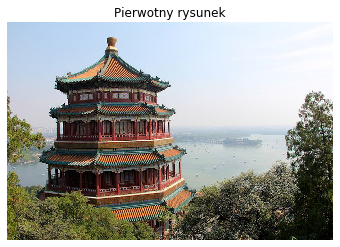

In [68]:
from sklearn.datasets import load_sample_images

img = load_sample_images()["images"][0]
plt.imshow(img)
plt.axis("off")
plt.title("Pierwotny rysunek")
plt.show()

In [0]:
data = tf.io.encode_jpeg(img)
example_with_image = Example(features=Features(feature={
    "image": Feature(bytes_list=BytesList(value=[data.numpy()]))}))
serialized_example = example_with_image.SerializeToString()
# następnie zapisuje do formatu TFRecord

In [0]:
feature_description = { "image": tf.io.VarLenFeature(tf.string) }
example_with_image = tf.io.parse_single_example(serialized_example, feature_description)
decoded_img = tf.io.decode_jpeg(example_with_image["image"].values[0])

Możesz ewentualnie skorzystać z funkcji `decode_image()`, obsługujący formaty BMP, GIF, JPEG i PNG:

In [0]:
decoded_img = tf.io.decode_image(example_with_image["image"].values[0])

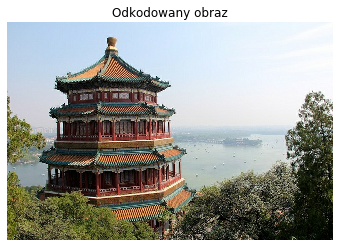

In [72]:
plt.imshow(decoded_img)
plt.title("Odkodowany obraz")
plt.axis("off")
plt.show()

### Wstawianie tensorów i tensorów rzadkich w plikach TFRecords

Tensory można z łatwością serializować i analizować ich składnię za pomocą funkcji, odpowiednio `tf.io.serialize_tensor()` i `tf.io.parse_tensor()`:

In [73]:
t = tf.constant([[0., 1.], [2., 3.], [4., 5.]])
s = tf.io.serialize_tensor(t)
s

<tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x01\x12\x08\x12\x02\x08\x03\x12\x02\x08\x02"\x18\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00@\x00\x00@@\x00\x00\x80@\x00\x00\xa0@'>

In [74]:
tf.io.parse_tensor(s, out_type=tf.float32)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 1.],
       [2., 3.],
       [4., 5.]], dtype=float32)>

In [75]:
serialized_sparse = tf.io.serialize_sparse(parsed_example["emails"])
serialized_sparse

<tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'\x08\t\x12\x08\x12\x02\x08\x02\x12\x02\x08\x01"\x10\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00',
       b'\x08\x07\x12\x04\x12\x02\x08\x02"\x10\x07\x07a@b.comc@d.com',
       b'\x08\t\x12\x04\x12\x02\x08\x01"\x08\x02\x00\x00\x00\x00\x00\x00\x00'],
      dtype=object)>

In [76]:
BytesList(value=serialized_sparse.numpy())

value: "\010\t\022\010\022\002\010\002\022\002\010\001\"\020\000\000\000\000\000\000\000\000\001\000\000\000\000\000\000\000"
value: "\010\007\022\004\022\002\010\002\"\020\007\007a@b.comc@d.com"
value: "\010\t\022\004\022\002\010\001\"\010\002\000\000\000\000\000\000\000"

In [0]:
dataset = tf.data.TFRecordDataset(["moje_kontakty.tfrecord"]).batch(10)
for serialized_examples in dataset:
    parsed_examples = tf.io.parse_example(serialized_examples,
                                          feature_description)

In [78]:
parsed_examples

{'image': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7fde63e53128>}

## Obsługa danych sekwencyjnych za pomocą bufora protokołów `SequenceExample`

```proto
syntax = "proto3";

message FeatureList { repeated Feature feature = 1; };
message FeatureLists { map<string, FeatureList> feature_list = 1; };
message SequenceExample {
  Features context = 1;
  FeatureLists feature_lists = 2;
};
```

In [0]:
# OSTRZEŻENIE: obcenie istnieje błąd uniemożliwiający wykorzystanie "from tensorflow.train import X"
#              dlatego wprowadzamy obejście w postaci  "X = tf.train.X"
#from tensorflow.train import FeatureList, FeatureLists, SequenceExample
FeatureList = tf.train.FeatureList
FeatureLists = tf.train.FeatureLists
SequenceExample = tf.train.SequenceExample

context = Features(feature={
    "author_id": Feature(int64_list=Int64List(value=[123])),
    "title": Feature(bytes_list=BytesList(value=[b"A", b"desert", b"place", b"."])),
    "pub_date": Feature(int64_list=Int64List(value=[1623, 12, 25]))
})

content = [["When", "shall", "we", "three", "meet", "again", "?"],
           ["In", "thunder", ",", "lightning", ",", "or", "in", "rain", "?"]]
comments = [["When", "the", "hurlyburly", "'s", "done", "."],
            ["When", "the", "battle", "'s", "lost", "and", "won", "."]]

def words_to_feature(words):
    return Feature(bytes_list=BytesList(value=[word.encode("utf-8")
                                               for word in words]))

content_features = [words_to_feature(sentence) for sentence in content]
comments_features = [words_to_feature(comment) for comment in comments]
            
sequence_example = SequenceExample(
    context=context,
    feature_lists=FeatureLists(feature_list={
        "content": FeatureList(feature=content_features),
        "comments": FeatureList(feature=comments_features)
    }))

In [80]:
sequence_example

context {
  feature {
    key: "author_id"
    value {
      int64_list {
        value: 123
      }
    }
  }
  feature {
    key: "pub_date"
    value {
      int64_list {
        value: 1623
        value: 12
        value: 25
      }
    }
  }
  feature {
    key: "title"
    value {
      bytes_list {
        value: "A"
        value: "desert"
        value: "place"
        value: "."
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "comments"
    value {
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "hurlyburly"
          value: "\'s"
          value: "done"
          value: "."
        }
      }
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "battle"
          value: "\'s"
          value: "lost"
          value: "and"
          value: "won"
          value: "."
        }
      }
    }
  }
  feature_list {
    key: "content"
    value {
      feature {
      

In [0]:
serialized_sequence_example = sequence_example.SerializeToString()

In [0]:
context_feature_descriptions = {
    "author_id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "title": tf.io.VarLenFeature(tf.string),
    "pub_date": tf.io.FixedLenFeature([3], tf.int64, default_value=[0, 0, 0]),
}
sequence_feature_descriptions = {
    "content": tf.io.VarLenFeature(tf.string),
    "comments": tf.io.VarLenFeature(tf.string),
}
parsed_context, parsed_feature_lists = tf.io.parse_single_sequence_example(
    serialized_sequence_example, context_feature_descriptions,
    sequence_feature_descriptions)

In [83]:
parsed_context

{'author_id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'pub_date': <tf.Tensor: shape=(3,), dtype=int64, numpy=array([1623,   12,   25])>,
 'title': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7fde63d36d30>}

In [84]:
parsed_context["title"].values

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'A', b'desert', b'place', b'.'], dtype=object)>

In [85]:
parsed_feature_lists

{'comments': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7fde63d36d68>,
 'content': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7fde63d36da0>}

In [86]:
print(tf.RaggedTensor.from_sparse(parsed_feature_lists["content"]))

<tf.RaggedTensor [[b'When', b'shall', b'we', b'three', b'meet', b'again', b'?'], [b'In', b'thunder', b',', b'lightning', b',', b'or', b'in', b'rain', b'?']]>


# Interfejs cech (Features API)

Skorzystajmy z użytego w rozdziale 2. wariantu zestawu danych California housing, ponieważ zawiera on cechy kategorialne i brakujące wartości:

In [0]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("zestawy danych", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [0]:
fetch_housing_data()

In [0]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [90]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [0]:
housing_median_age = tf.feature_column.numeric_column("housing_median_age")

In [0]:
age_mean, age_std = X_mean[1], X_std[1]  # Mediana wieku to kolumna w 1.
housing_median_age = tf.feature_column.numeric_column(
    "housing_median_age", normalizer_fn=lambda x: (x - age_mean) / age_std)

In [0]:
median_income = tf.feature_column.numeric_column("median_income")
bucketized_income = tf.feature_column.bucketized_column(
    median_income, boundaries=[1.5, 3., 4.5, 6.])

In [94]:
bucketized_income

BucketizedColumn(source_column=NumericColumn(key='median_income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(1.5, 3.0, 4.5, 6.0))

In [0]:
ocean_prox_vocab = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
ocean_proximity = tf.feature_column.categorical_column_with_vocabulary_list(
    "ocean_proximity", ocean_prox_vocab)

In [96]:
ocean_proximity

VocabularyListCategoricalColumn(key='ocean_proximity', vocabulary_list=('<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [97]:
# Wyłącznie przykład, nie korzystamy z tego później
city_hash = tf.feature_column.categorical_column_with_hash_bucket(
    "city", hash_bucket_size=1000)
city_hash

HashedCategoricalColumn(key='city', hash_bucket_size=1000, dtype=tf.string)

In [0]:
bucketized_age = tf.feature_column.bucketized_column(
    housing_median_age, boundaries=[-1., -0.5, 0., 0.5, 1.]) # wiek został przeskalowany
age_and_ocean_proximity = tf.feature_column.crossed_column(
    [bucketized_age, ocean_proximity], hash_bucket_size=100)

In [0]:
latitude = tf.feature_column.numeric_column("latitude")
longitude = tf.feature_column.numeric_column("longitude")
bucketized_latitude = tf.feature_column.bucketized_column(
    latitude, boundaries=list(np.linspace(32., 42., 20 - 1)))
bucketized_longitude = tf.feature_column.bucketized_column(
    longitude, boundaries=list(np.linspace(-125., -114., 20 - 1)))
location = tf.feature_column.crossed_column(
    [bucketized_latitude, bucketized_longitude], hash_bucket_size=1000)

In [0]:
ocean_proximity_one_hot = tf.feature_column.indicator_column(ocean_proximity)

In [0]:
ocean_proximity_embed = tf.feature_column.embedding_column(ocean_proximity,
                                                           dimension=2)

### Używanie kolumn cech do analizy składni

In [0]:
median_house_value = tf.feature_column.numeric_column("median_house_value")

In [103]:
columns = [housing_median_age, median_house_value]
feature_descriptions = tf.feature_column.make_parse_example_spec(columns)
feature_descriptions

{'housing_median_age': FixedLenFeature(shape=(1,), dtype=tf.float32, default_value=None),
 'median_house_value': FixedLenFeature(shape=(1,), dtype=tf.float32, default_value=None)}

In [0]:
with tf.io.TFRecordWriter("moje_dane_z_cechami.tfrecords") as f:
    for x, y in zip(X_train[:, 1:2], y_train):
        example = Example(features=Features(feature={
            "housing_median_age": Feature(float_list=FloatList(value=[x])),
            "median_house_value": Feature(float_list=FloatList(value=[y]))
        }))
        f.write(example.SerializeToString())

In [0]:
def parse_examples(serialized_examples):
    examples = tf.io.parse_example(serialized_examples, feature_descriptions)
    targets = examples.pop("median_house_value") # rozdziela dane docelowe
    return examples, targets

batch_size = 32
dataset = tf.data.TFRecordDataset(["moje_dane_z_cechami.tfrecords"])
dataset = dataset.repeat().shuffle(10000).batch(batch_size).map(parse_examples)

**Ostrzeżenie**: obecnie warstwa `DenseFeatures` nie współdziała z interfejsem funkcyjnym, zobacz [problem TF numer 27416](https://github.com/tensorflow/tensorflow/issues/27416). Miejmy nadzieję, że zostanie on rozwiązany przed wydaniem ostatetcznej wersji modułu TF 2.0.

In [106]:
columns_without_target = columns[:-1]
model = keras.models.Sequential([
    keras.layers.DenseFeatures(feature_columns=columns_without_target),
    keras.layers.Dense(1)
])
model.compile(loss="mse",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
model.fit(dataset, steps_per_epoch=len(X_train) // batch_size, epochs=5)

Train for 362 steps
Epoch 1/5
362/362 [==============================] - 1s 3ms/step - loss: 4.5895 - accuracy: 0.0014
Epoch 2/5
362/362 [==============================] - 1s 3ms/step - loss: 2.1288 - accuracy: 0.0024
Epoch 3/5
362/362 [==============================] - 1s 3ms/step - loss: 1.5127 - accuracy: 0.0029
Epoch 4/5
362/362 [==============================] - 1s 3ms/step - loss: 1.3653 - accuracy: 0.0026
Epoch 5/5
362/362 [==============================] - 1s 3ms/step - loss: 1.3249 - accuracy: 0.0034


In [107]:
some_columns = [ocean_proximity_embed, bucketized_income]
dense_features = keras.layers.DenseFeatures(some_columns)
dense_features({
    "ocean_proximity": [["NEAR OCEAN"], ["INLAND"], ["INLAND"]],
    "median_income": [[3.], [7.2], [1.]]
})

<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.07163955, -0.19811043],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.47403133, -0.19153829],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.47403133, -0.19153829]], dtype=float32)>

# Projekt TF Transform

In [0]:
try:
    import tensorflow_transform as tft

    def preprocess(inputs):  # dane wejściowe jako grupa cech wejściowych
        median_age = inputs["housing_median_age"]
        ocean_proximity = inputs["ocean_proximity"]
        standardized_age = tft.scale_to_z_score(median_age - tft.mean(median_age))
        ocean_proximity_id = tft.compute_and_apply_vocabulary(ocean_proximity)
        return {
            "standardized_median_age": standardized_age,
            "ocean_proximity_id": ocean_proximity_id
        }
except ImportError:
    print("Projekt TF Transform nie jest zainstalowany. Skorzystaj z polecenia: pip3 install -U tensorflow-transform")

# Projekt TensorFlow Datasets

In [109]:
import tensorflow_datasets as tfds

datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [110]:
print(tfds.list_builders())

['abstract_reasoning', 'aeslc', 'aflw2k3d', 'amazon_us_reviews', 'arc', 'bair_robot_pushing_small', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'cmaterdb', 'cnn_dailymail', 'coco', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'cos_e', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'diabetic_retinopathy_detection', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'dummy_dataset_shared_generator', 'dummy_mnist', 'emnist', 'esnli', 'eurosat', 'fashion_mnist', 'flic', 'flores', 'food101', 'gap', 'gigaword', 'glue', 'groove', 'higgs', 'horses_or_humans', 'i_naturalist2017', 'image_label_folder', 'imagenet2012', 'imagenet201

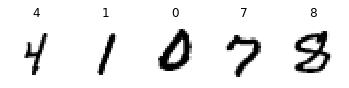

In [111]:
plt.figure(figsize=(6,3))
mnist_train = mnist_train.repeat(5).batch(32).prefetch(1)
for item in mnist_train:
    images = item["image"]
    labels = item["label"]
    for index in range(5):
        plt.subplot(1, 5, index + 1)
        image = images[index, ..., 0]
        label = labels[index].numpy()
        plt.imshow(image, cmap="binary")
        plt.title(label)
        plt.axis("off")
    break # wyświetla fragment pierwszej grupy

In [112]:
datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]
mnist_train = mnist_train.repeat(5).batch(32)
mnist_train = mnist_train.map(lambda items: (items["image"], items["label"]))
mnist_train = mnist_train.prefetch(1)
for images, labels in mnist_train.take(1):
    print(images.shape)
    print(labels.numpy())

(32, 28, 28, 1)
[4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]


In [113]:
datasets = tfds.load(name="mnist", batch_size=32, as_supervised=True)
mnist_train = datasets["train"].repeat().prefetch(1)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Lambda(lambda images: tf.cast(images, tf.float32)),
    keras.layers.Dense(10, activation="softmax")])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
model.fit(mnist_train, steps_per_epoch=60000 // 32, epochs=5)

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 32.1245 - accuracy: 0.8427
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 25.6590 - accuracy: 0.8691
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 24.6792 - accuracy: 0.8733
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 24.2072 - accuracy: 0.8757
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 23.7536 - accuracy: 0.8776


# Projekt TensorFlow Hub

In [114]:
import tensorflow_hub as hub

hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1",
                           output_shape=[50], input_shape=[], dtype=tf.string)

model = keras.Sequential()
model.add(hub_layer)
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense_4 (Dense)              (None, 16)                816       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 833
Non-trainable params: 48,190,600
_________________________________________________________________


In [0]:
sentences = tf.constant(["It was a great movie", "The actors were amazing"])
embeddings = hub_layer(sentences)

In [116]:
embeddings

<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[ 7.45939985e-02,  2.76720114e-02,  9.38646123e-02,
         1.25124469e-01,  5.40293928e-04, -1.09435350e-01,
         1.34755149e-01, -9.57818255e-02, -1.85177118e-01,
        -1.69703495e-02,  1.75612606e-02, -9.06603858e-02,
         1.12110220e-01,  1.04646273e-01,  3.87700424e-02,
        -7.71859884e-02, -3.12189370e-01,  6.99466765e-02,
        -4.88970093e-02, -2.99049795e-01,  1.31183028e-01,
        -2.12630898e-01,  6.96169436e-02,  1.63592950e-01,
         1.05169769e-02,  7.79720694e-02, -2.55230188e-01,
        -1.80790052e-01,  2.93739915e-01,  1.62875261e-02,
        -2.80566931e-01,  1.60284728e-01,  9.87277832e-03,
         8.44555616e-04,  8.39456245e-02,  3.24002892e-01,
         1.53253034e-01, -3.01048346e-02,  8.94618109e-02,
        -2.39153411e-02, -1.50188789e-01, -1.81733668e-02,
        -1.20483577e-01,  1.32937476e-01, -3.35325629e-01,
        -1.46504581e-01, -1.25251599e-02, -1.64428815e-01,
       